## Loading Data

Take the data from the crawler of your own choice and save it as a CSV. If you are finding some difficulties, you can use [this file](/consolidatedTweets.csv) to reproduce the results.


In [1]:
import pandas as pd

tweets_data = pd.read_csv("consolidatedTweets.csv")

tweets_data

,Unnamed: 0,full_text,created_at,favorite_count,quote_count,retweet_count,reply_count
0,0,This week in Nature: Lonely plants – isolation...,2024-08-22T16:50:42.000Z,95,1,16,5
1,1,"Dr. Katie Bouman, who led the creation of an a...",2019-04-11T15:59:16.000Z,32470,2429,11540,450
2,2,"Dr. Katie Bouman, who led the creation of an a...",2019-04-13T14:00:36.000Z,8462,412,2488,145
3,3,Japanese research no longer world class — here...,2023-10-25T09:43:16.000Z,6973,1038,3642,70
4,4,Cutting health and science support should not ...,2023-11-07T19:52:50.000Z,6918,486,2626,376
...,...,...,...,...,...,...,...
1696,1696,Here’s a tribute to an Indian village in the s...,2019-12-30T08:02:28.000Z,4683,6,303,10
1697,1697,#AI experts from all over the world came toget...,2020-11-10T05:30:00.000Z,4784,7,201,22
1698,1698,What is life really like beneath the waves? A ...,2021-06-08T05:30:00.000Z,4673,11,279,139
1699,1699,Samsung began the lengthy task of designing th...,2019-11-19T02:15:00.000Z,4596,9,268,38


## Text Preprocessing



In [2]:
import re

text = "Call me Ishmael. Some years ago - never mind how long precisely - having little or no money in my purse, and nothing particular..."

punctuation_free_text = re.sub(r'[^\w\s]', '', text)

punctuation_free_text

'Call me Ishmael Some years ago  never mind how long precisely  having little or no money in my purse and nothing particular'

In [3]:
import re

text = "2:43PM: It is announced that flight EK-712 is delayed due to the..."
text = text.lower()
non_numeric_text = re.sub(r'\d+', '', text)

non_numeric_text

':pm: it is announced that flight ek- is delayed due to the...'

In [4]:
import nltk
nltk.download('punkt_tab')
from nltk import word_tokenize

tokens = word_tokenize("Out Stealing Horses has been embraced across the world as a classic, a novel of universal relevance and power.")

tokens
# 'Out','Stealing','Horses','has','been','embraced','across','the','world','as',......

[nltk_data] Downloading package punkt_tab to /Users/talha/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


['Out',
 'Stealing',
 'Horses',
 'has',
 'been',
 'embraced',
 'across',
 'the',
 'world',
 'as',
 'a',
 'classic',
 ',',
 'a',
 'novel',
 'of',
 'universal',
 'relevance',
 'and',
 'power',
 '.']

In [5]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
filtered_tokens = list(filter(lambda word: word.lower() not in stop_words, tokens))

filtered_tokens
# ['Stealing', 'Horses', 'embraced', 'across', 'world', 'classic', ',', 'novel', 'universal', 'relevance', 'power', '.']

['Stealing',
 'Horses',
 'embraced',
 'across',
 'world',
 'classic',
 ',',
 'novel',
 'universal',
 'relevance',
 'power',
 '.']

In [6]:
from nltk.stem import PorterStemmer

stemmer = PorterStemmer()
stem = stemmer.stem("playing")    #play

stem

'play'

In [7]:
stem = stemmer.stem("happiness")    #happi

stem

'happi'

In [8]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
nltk.download('wordnet')

lemmatizer = WordNetLemmatizer()

lemma = lemmatizer.lemmatize("happiness", pos=wordnet.NOUN)

lemma

[nltk_data] Downloading package wordnet to /Users/talha/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


'happiness'

## VADER

In [9]:
!pip install vaderSentiment

In [10]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()

score = analyzer.polarity_scores("We regret to inform you that the request product is unavailable.")

score
#scores: {'neg': 0.219, 'neu': 0.781, 'pos': 0.0, 'compound': -0.4215}

{'neg': 0.219, 'neu': 0.781, 'pos': 0.0, 'compound': -0.4215}

In [11]:
score = analyzer.polarity_scores("It was a sunny morning of March with flowers blossoming everywhere.")

score
#scores: {'neg': 0.0, 'neu': 0.781, 'pos': 0.219, 'compound': 0.4215}

{'neg': 0.0, 'neu': 0.781, 'pos': 0.219, 'compound': 0.4215}

In [12]:
def get_sentiment(text):
    score = analyzer.polarity_scores(text)
    if score['compound'] >= 0.05:
        return 'positive'
    elif score['compound'] <= -0.05:
        return 'negative'
    else:
        return 'neutral'

In [13]:
tweets_data['Sentiment'] = tweets_data['full_text'].apply(get_sentiment)

tweets_data

,Unnamed: 0,full_text,created_at,favorite_count,quote_count,retweet_count,reply_count,Sentiment
0,0,This week in Nature: Lonely plants – isolation...,2024-08-22T16:50:42.000Z,95,1,16,5,negative
1,1,"Dr. Katie Bouman, who led the creation of an a...",2019-04-11T15:59:16.000Z,32470,2429,11540,450,positive
2,2,"Dr. Katie Bouman, who led the creation of an a...",2019-04-13T14:00:36.000Z,8462,412,2488,145,positive
3,3,Japanese research no longer world class — here...,2023-10-25T09:43:16.000Z,6973,1038,3642,70,negative
4,4,Cutting health and science support should not ...,2023-11-07T19:52:50.000Z,6918,486,2626,376,positive
...,...,...,...,...,...,...,...,...
1696,1696,Here’s a tribute to an Indian village in the s...,2019-12-30T08:02:28.000Z,4683,6,303,10,positive
1697,1697,#AI experts from all over the world came toget...,2020-11-10T05:30:00.000Z,4784,7,201,22,positive
1698,1698,What is life really like beneath the waves? A ...,2021-06-08T05:30:00.000Z,4673,11,279,139,positive
1699,1699,Samsung began the lengthy task of designing th...,2019-11-19T02:15:00.000Z,4596,9,268,38,neutral


## Sentiment Analysis with ML

In [14]:
from sklearn.model_selection import train_test_split
randomState = 5

X_train, X_test, y_train, y_test = train_test_split(tweets_data['full_text'], tweets_data['Sentiment'], test_size=0.2, random_state=randomState)

train_df = pd.DataFrame({'full_text': X_train, 'sentiment': y_train})
test_df = pd.DataFrame({'full_text': X_test, 'sentiment': y_test})

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

tfidf_vectorizer = TfidfVectorizer()

tfidf_features_train = tfidf_vectorizer.fit_transform(X_train)
tfidf_features_test = tfidf_vectorizer.transform(X_test)

count_vectorizer = CountVectorizer()

cv_features_train = count_vectorizer.fit_transform(X_train)
cv_features_test = count_vectorizer.transform(X_test)

In [16]:
from sklearn.svm import SVC

svm_model = SVC(kernel='rbf', random_state=randomState)

In [17]:
from sklearn.metrics import accuracy_score

svm_model.fit(tfidf_features_train, y_train)

y_pred = svm_model.predict(tfidf_features_test)
accuracy = accuracy_score(y_test, y_pred)

accuracy
#varies between 61 and 66%

0.6187683284457478

## Visualizing Results


/opt/anaconda3/envs/NLP/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


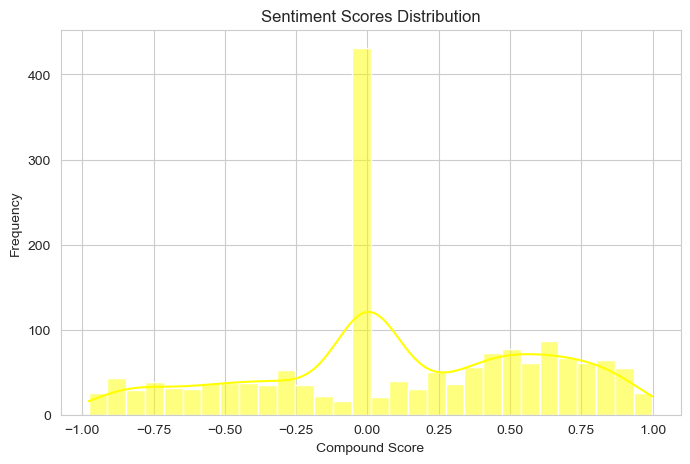

In [18]:
import matplotlib.pyplot as plt
import seaborn as sb

tweets_data['compound_sentiment_score'] = tweets_data['full_text'].apply(lambda text: analyzer.polarity_scores(text)['compound'])

plt.figure(figsize=(8, 5))
sb.histplot(tweets_data['compound_sentiment_score'], bins=30, kde=True, color='yellow')
plt.title('Sentiment Scores Distribution')
plt.xlabel('Compound Score')
plt.ylabel('Frequency')
plt.show()

In [19]:
!pip install wordcloud

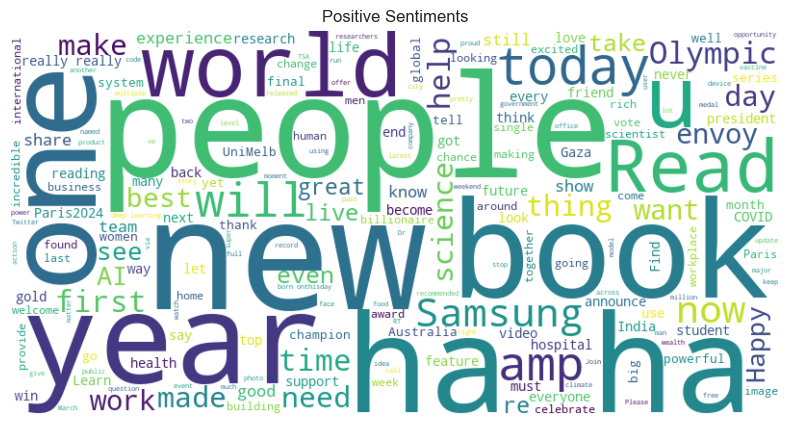

In [20]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

excluded_words = {'https', 't', 'co', 'S'}
stopwords = set(WordCloud().stopwords)
stopwords.update(excluded_words)

text_for_sentiment = tweets_data[tweets_data['Sentiment'] == 'positive']['full_text'].str.cat(sep=' ')
wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=stopwords).generate(text_for_sentiment)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Positive Sentiments')
plt.show()